In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [17]:
df = pd.read_csv('data-candle-15fps/output.csv')
del df['Unnamed: 0']
df = df.set_index('time')
df.fillna(method='ffill', inplace=True)
df

,pm2.5,pm1.0,pm10
time,,,
0.000000,2042,187,6029
0.266667,1978,187,6029
0.333333,1978,204,5193
1.066667,1888,204,5193
1.133333,1888,229,4370
...,...,...,...
30.133333,61,45,63
31.066667,54,40,56
32.000000,48,36,50


<AxesSubplot:xlabel='time'>

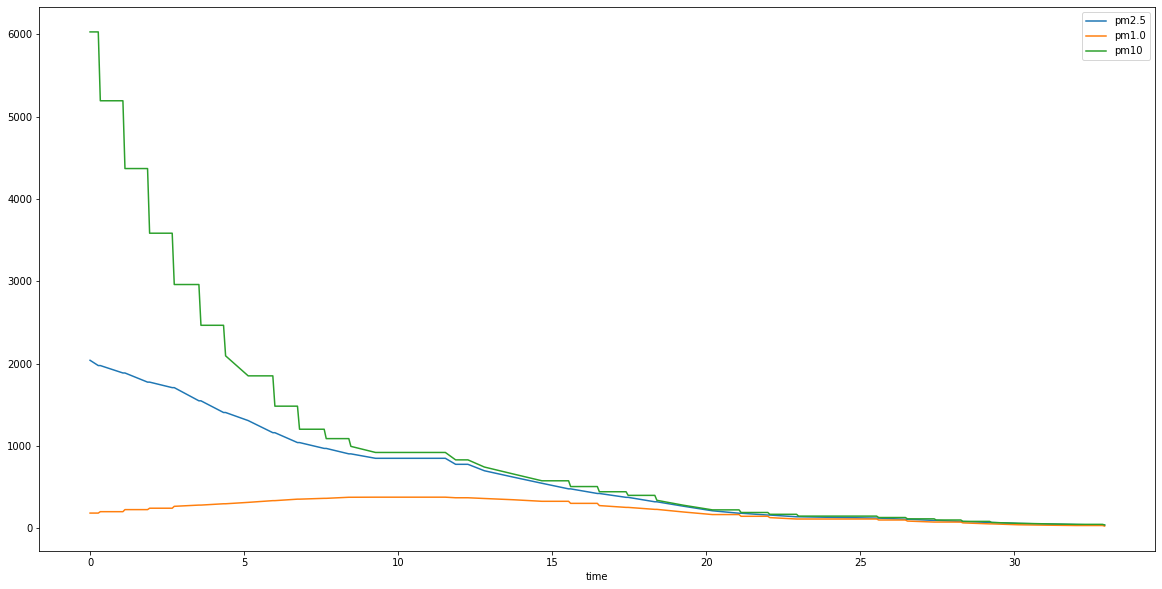

In [18]:
df.plot(kind='line', figsize=(20,10))

ACH: 339.51037325720887
stddev: 5.3215442247991565


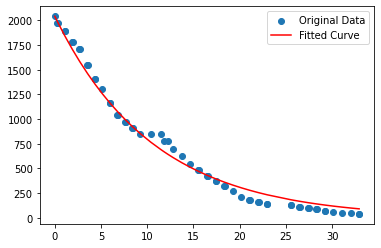

In [21]:
df_pm25 = df[['pm2.5']].copy()

# see equation (S1) from supplemental material here: https://www.tandfonline.com/doi/full/10.1080/02786826.2022.2054674?scroll=top&needAccess=true
C_bgd = 0
C_pt0 = df_pm25['pm2.5'][0]

# logarithmic function
def func(t, ACH):
    # divide by 3600 to convert seconds to hours
    return C_bgd + C_pt0 * np.exp(-ACH*t / 3600)

popt, pcov = curve_fit(func, df_pm25.index, df_pm25['pm2.5'])
print('ACH: {}'.format(popt[0]))
print('stddev: {}'.format(np.sqrt(np.diag(pcov))[0]))
plt.figure()
plt.scatter(df_pm25.index, df_pm25['pm2.5'], label="Original Data")
plt.plot(df_pm25.index, func(df_pm25.index, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()